In [1602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# STORYTELLING with financial spendings.



***starting with a sample dataset***, we potentially want to investigate what insigths can be derived from a dataset concentrating ones spendings (Habits; trends etc.)
  
  ***with respect to time:***
 - How does the data differ from months to months
 - How does the data differ from summer vs. winter

therefore we differentiate the data regarding:
- fix vs. flexible costs
- basic need / luxoury ("nice to have") spendings

- are there any trends in the way money is spend?
- how does the absolute and relative spendings within the different categories differ?



# Data Inspection - unpreprocessed dataset

In [1603]:
os.getcwd()
file_path01 = r"../data/cristina_dataset/Cristina_Dataset_230218.xlsx"
file_path02 = r"../data/cristina_dataset/Cristina_Dataset_230222.csv"



In [1604]:
#read dataframe
df = pd.read_excel(file_path01)


In [1605]:
#set up of the file
print(df.head(-5))
print("\n")
df.info()


         Category                        Detail    Cost       Date
0      Eating Out                        Brunch   15.00 2022-07-25
1        Shopping                        Uniqlo  144.50 2022-07-25
2         Hobbies                   Salsa Class  130.00 2022-07-27
3       Groceries                     Groceries    6.78 2022-07-27
4      Eating Out                        Ditsch    2.00 2022-07-27
5       Groceries                     Groceries   45.27 2022-07-27
6    Rent + Bills  Shared Rent + Bills expenses   14.18 2022-07-28
7       Groceries                     Groceries   10.89 2022-07-29
8       Groceries                     Groceries   29.06 2022-07-29
9      Eating Out                        Ditsch    2.20 2022-07-29
10   Rent + Bills                        Moving   17.78 2022-07-31
11     Investment                    Weekly ETH    6.00 2022-08-01
12      Groceries                     Groceries   65.17 2022-08-01
13   Rent + Bills                          Rent  500.00 2022-0

In [1606]:
print(df.Category.unique())
print("\n")
print(len(df.Category.unique()))
print("\n")
print(df.Detail.unique())


['Eating Out' 'Shopping' 'Hobbies' 'Groceries' 'Rent + Bills' 'Investment'
 'Transport' 'Student Loan' 'Travel' 'Healthcare' 'Selfcare']


11


['Brunch' 'Uniqlo' 'Salsa Class' 'Groceries' 'Ditsch'
 'Shared Rent + Bills expenses' 'Moving' 'Weekly ETH' 'Rent' 'BVG' 'Phone'
 'Postal re-route' 'Snacks' 'Bi-Weekly ETF' 'Stock' 'Passport photos'
 'Restaurant + Drinks' 'Salsa Festival Surcharge'
 'Driver license conversion' 'Student Loan' 'Sisyphos' 'Google' 'Patreon'
 'Insurance' 'Post salsa pizza' 'Pub Quiz' 'Flea market' 'Juice'
 'Poland Bus' 'Birthday present' 'Train castellvi' 'YEGO'
 'Pills pills pills ' 'Bi-Weekly Stock' 'Pills pills pills' 'Tampons'
 'Olive oil' 'Libro de la abuela' 'Spanish foooood' 'Taxi airport' 'Salsa'
 'Travel' 'Finger cut' 'Thai park' 'Baptism flight'
 'Train tickets to visit Fran' 'Teeth cleaning' 'Poland hotel' 'UK Phone'
 'Date' 'Salsa Festival' 'Extension ticket BVG' 'Extension ticket'
 'Avanico' 'Phone surcharge' 'Fruit' 'Hot water bottle' 'DM'
 'Vase and 

In [1607]:
df[df["Category"]== "Investment"]

,Category,Detail,Cost,Date
11,Investment,Weekly ETH,6.0,2022-08-01
16,Investment,Weekly ETH,6.0,2022-07-25
17,Investment,Weekly ETH,10.0,2022-08-08
18,Investment,Weekly ETH,10.0,2022-08-15
19,Investment,Weekly ETH,10.0,2022-08-22
24,Investment,Bi-Weekly ETF,50.0,2022-08-16
25,Investment,Stock,10.0,2022-08-16
57,Investment,Weekly ETH,10.0,2022-08-29
58,Investment,Weekly ETH,10.0,2022-09-05
59,Investment,Weekly ETH,10.0,2022-09-12


# Data Inspection - preprocessed dataset

In [1608]:
df01 = pd.read_csv(file_path02)

In [1609]:
#Checking for NA values
df01.isna().sum()

Category    0
Detail      0
Cost        0
Date        0
dtype: int64

In [1610]:
# Checking data types
df01.dtypes

Category    object
Detail      object
Cost        object
Date        object
dtype: object

In [1611]:
# Checking the shape of the dataframe
df01.shape

print("The dataframe has 324 rows and 4 columns.")

The dataframe has 324 rows and 4 columns.


# Duplicates check

In [1612]:
# check for duplicate rows where every column value is duplicated
duplicate_rows = df01[df01.duplicated(subset=df01.columns, keep=False)]

# print the duplicate rows
print(duplicate_rows)

         Category                        Detail     Cost         Date
65   Rent + Bills                          Rent  €500.00   1-Sep-2022
114  Rent + Bills                          Rent  €500.00   1-Sep-2022
155  Rent + Bills                        Google    €1.88   4-Nov-2022
156  Rent + Bills  Personal Liability Insurance    €4.94   1-Nov-2022
157  Student Loan                  Student Loan   €86.40  10-Nov-2022
158     Transport                           BVG   €28.58   1-Nov-2022
159  Rent + Bills                      UK Phone   €10.00  13-Nov-2022
160  Rent + Bills               Legal Insurance   €35.00   1-Nov-2022
194  Rent + Bills                        Google    €1.88   4-Nov-2022
195  Rent + Bills  Personal Liability Insurance    €4.94   1-Nov-2022
196  Student Loan                  Student Loan   €86.40  10-Nov-2022
197     Transport                           BVG   €28.58   1-Nov-2022
198  Rent + Bills                      UK Phone   €10.00  13-Nov-2022
199  Rent + Bills   

In [1613]:
# Correcting the duplicate rent paid in September

df01.loc[114, 'Date'] = '1-Oct-2022'

In [1614]:
# check for duplicate rows where every column value is duplicated
duplicate_rows = df01[df01.duplicated(subset=df01.columns, keep=False)]

# print the duplicate rows
print(duplicate_rows)

         Category                        Detail    Cost         Date
155  Rent + Bills                        Google   €1.88   4-Nov-2022
156  Rent + Bills  Personal Liability Insurance   €4.94   1-Nov-2022
157  Student Loan                  Student Loan  €86.40  10-Nov-2022
158     Transport                           BVG  €28.58   1-Nov-2022
159  Rent + Bills                      UK Phone  €10.00  13-Nov-2022
160  Rent + Bills               Legal Insurance  €35.00   1-Nov-2022
194  Rent + Bills                        Google   €1.88   4-Nov-2022
195  Rent + Bills  Personal Liability Insurance   €4.94   1-Nov-2022
196  Student Loan                  Student Loan  €86.40  10-Nov-2022
197     Transport                           BVG  €28.58   1-Nov-2022
198  Rent + Bills                      UK Phone  €10.00  13-Nov-2022
199  Rent + Bills               Legal Insurance  €35.00   1-Nov-2022
236  Rent + Bills                         Phone  €25.00  25-Dec-2022
271  Rent + Bills                 

#### Working with and standardising columns

In [1615]:
# Built-in library to work with dates.
from datetime import datetime

In [1616]:
# Convert the 'Date' column to datetime
df01['Date'] = pd.to_datetime(df01['Date'])

In [1617]:
# Convert the 'cost' column to float
df01['Cost'] = df01['Cost'].str.replace('€', '').astype(float)

In [1618]:
# Checking code worked
df01.dtypes

Category            object
Detail              object
Cost               float64
Date        datetime64[ns]
dtype: object

In [1619]:
df01.head()

,Category,Detail,Cost,Date
0,Eating Out,Brunch,15.00,2022-07-25
1,Shopping,Uniqlo,144.50,2022-07-25
2,Hobbies,Salsa Class,130.00,2022-07-27
3,Groceries,Groceries,6.78,2022-07-27
4,Eating Out,Ditsch,2.00,2022-07-27


### Classifying the Category column to Variable vs Fixed Costs

In [1620]:
# create a dictionary with the category as the key and the corresponding classification as the value
category_classification = {
    'Eating Out': 'Variable',
    'Shopping': 'Variable',
    'Hobbies': 'Variable',
    'Groceries': 'Variable',
    'Rent + Bills': 'Fixed',
    'Investment': 'Variable',
    'Transport': 'Variable',
    'Student Loan': 'Fixed',
    'Travel': 'Variable',
    'Healthcare': 'Variable',
    'Selfcare': 'Variable'
}

# create a new column with the classifications using the map() function
df01['Classification'] = df01['Category'].map(category_classification)


### Classifying to Nice to Have vs Necessary costs

In [1621]:
# create a dictionary with the category as the key and the corresponding classification as the value
category_type = {
    'Eating Out': 'Nice to have',
    'Shopping': 'Nice to have',
    'Hobbies': 'Nice to have',
    'Groceries': 'Necessary',
    'Rent + Bills': 'Necessary',
    'Investment': 'Nice to have',
    'Transport': 'Necessary',
    'Student Loan': 'Necessary',
    'Travel': 'Nice to have',
    'Healthcare': 'Necessary',
    'Selfcare': 'Nice to have'
}

# create a new column with the classifications using the map() function
df01['Type'] = df01['Category'].map(category_type)


In [1622]:
# Define the start and end dates for each period
periods = {'Jul - Aug 22': ('2022-07-25', '2022-08-24'),
           'Aug - Sep 22': ('2022-08-25', '2022-09-24'),
           'Sep - Oct 22': ('2022-09-25', '2022-10-24'),
           'Oct - Nov 22': ('2022-10-25', '2022-11-24'),
           'Nov - Dec 22': ('2022-11-25', '2022-12-24'),
           'Dec - Jan 22': ('2022-12-25', '2023-01-24'),
           'Jan - Feb 23': ('2023-01-25', '2023-02-24')}

# Iterate over the periods and create a new column with the corresponding period label
for period, dates in periods.items():
    start_date = pd.to_datetime(dates[0])
    end_date = pd.to_datetime(dates[1])
    mask = (df01['Date'] >= start_date) & (df01['Date'] <= end_date)
    df01.loc[mask, 'Month'] = period

### Looking at the data

#### Cost vs Category

In [1623]:
# Calculate the total cost for each category
category_costs = df01.groupby('Category')['Cost'].sum().round(2).sort_values(ascending=False)

In [1624]:
# Calculate the total cost for each category
type_costs = df01.groupby('Type')['Cost'].sum().round(2).sort_values(ascending=False)

In [1625]:
# Calculate the total cost for each category
classification_costs = df01.groupby('Classification')['Cost'].sum().round(2).sort_values(ascending=False)

In [1626]:
# Calculate the percentage of the total cost for each category
category_percentages = ((category_costs / category_costs.sum()) * 100).round(2)

In [1627]:
# Calculate the percentage of the cost for each type
type_percentages = ((type_costs / type_costs.sum()) * 100).round(2)

In [1628]:
# Calculate the percentage of the cost for each classification
classification_percentages = ((classification_costs / classification_costs.sum()) * 100).round(2)

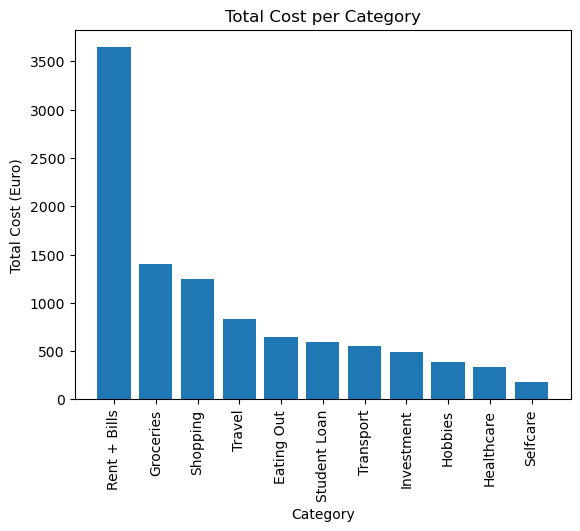

In [1629]:
# Create a bar chart of the total cost for each category
fig, ax = plt.subplots()
ax.bar(category_costs.index, category_costs)

# Set the title and axis labels
ax.set_title('Total Cost per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Cost (Euro)')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

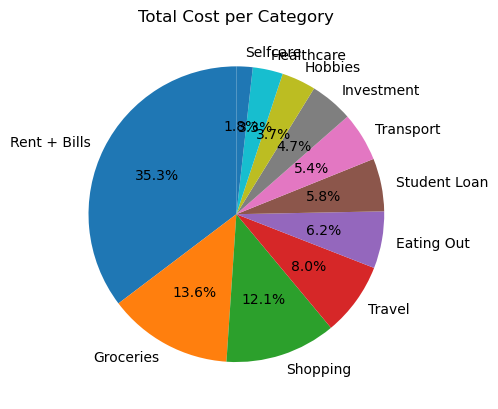

In [1630]:
# Create a pie chart of the percentage of the total cost for each category
fig, ax = plt.subplots()
ax.pie(category_percentages, labels=category_costs.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Total Cost per Category')

# Show the plot
plt.show()

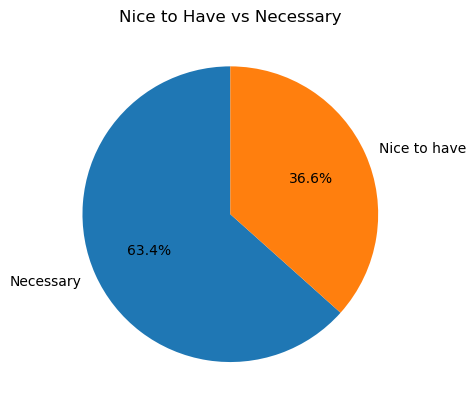

In [1631]:
# Create a pie chart of the percentage of the Nice to Have vs Necessary
fig, ax = plt.subplots()
ax.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Nice to Have vs Necessary')

# Show the plot
plt.show()

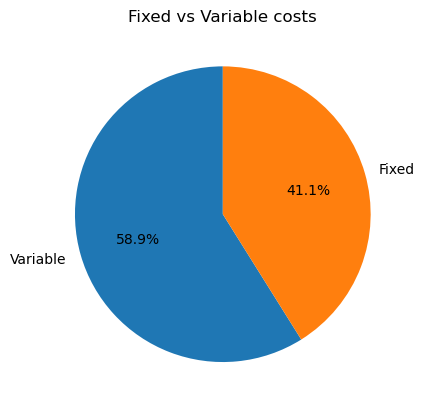

In [1632]:
# Create a pie chart of the percentage of the variables vs fixed costs
fig, ax = plt.subplots()
ax.pie(classification_percentages, labels=classification_percentages.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Fixed vs Variable costs')

# Show the plot
plt.show()

#### Looking it at it in a month by month basis

In [1633]:
# set date column as the index
df01.set_index('Date', inplace=True)

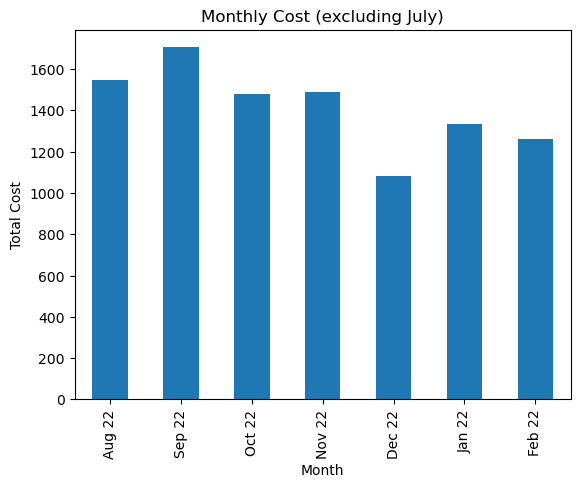

In [1634]:
# groupby and sum by month, excluding July
monthly_cost = df01.loc[df01.index.month != 7, 'Cost'].resample('M').sum()

# modify the x-axis labels
x_labels = ['Aug 22', 'Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 22', 'Feb 22']

# plot the monthly cost as a bar chart
ax = monthly_cost.plot.bar(y=monthly_cost.values)

# set the x-axis tick labels
ax.set_xticklabels(x_labels)

# set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Total Cost')
ax.set_title('Monthly Cost (excluding July)')

# display the chart
plt.show()

In [1635]:
order = ['Jul - Aug 22', 'Aug - Sep 22', 'Sep - Oct 22', 'Oct - Nov 22', 'Nov - Dec 22', 'Dec - Jan 22', 'Jan - Feb 23']
costs_by_month = df01.groupby(['Month'])['Cost'].sum().reindex(order)
costs_by_month

Month
Jul - Aug 22    1728.87
Aug - Sep 22    1776.55
Sep - Oct 22    1631.22
Oct - Nov 22    1265.33
Nov - Dec 22    1207.29
Dec - Jan 22    1203.47
Jan - Feb 23    1510.45
Name: Cost, dtype: float64

/var/folders/3q/nnwccsgd66z2jvxb97zk6gw40000gn/T/ipykernel_64282/2352677396.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(costs_by_month.index, rotation='vertical')


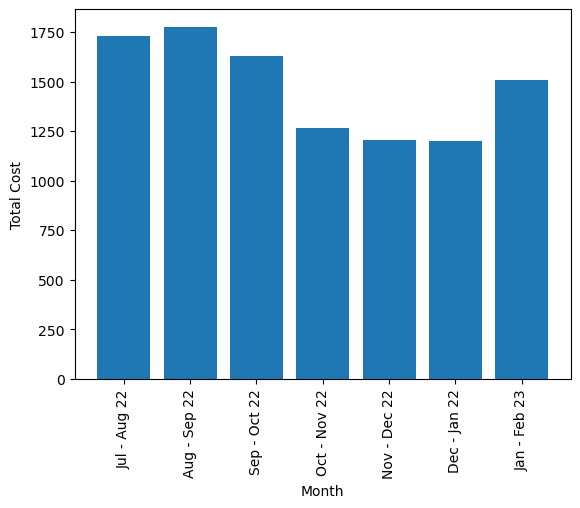

In [1636]:
fig, ax = plt.subplots()
ax.bar(costs_by_month.index, costs_by_month.values)
ax.set_xticklabels(costs_by_month.index, rotation='vertical')
ax.set_xlabel('Month')
ax.set_ylabel('Total Cost')
plt.show()